<a href="https://colab.research.google.com/github/pavi-1994/bike_sharing_demand_prediction_capstone_project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from datetime import datetime
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#path of a file
file_path="/content/drive/MyDrive/almabetter/module 4/capstone_project_2/SeoulBikeData.csv"

In [4]:
# importing dataset
bike_df=pd.read_csv(file_path,encoding = 'latin')
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#create a copy of dataframe
bike_rent_df=bike_df.copy()

In [7]:
#checking the shape of the bike_df
print(f'shape of the bike_df : {bike_df.shape}')

shape of the bike_df : (8760, 14)


In [8]:
#check the columns present in the bike_df
print(f'Feature of bike_df :\n {bike_df.columns}')

Feature of bike_df :
 Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [9]:
#check the datatypes of columns present in the bike_df
print(f'Feature datatype of bike_df :\n\n {bike_df.dtypes}')

Feature datatype of bike_df :

 Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


In [10]:
#check no of unique element present in each feature (columns)
bike_df.nunique()


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

### Handling Missing values

In [11]:
#checking for null value 
print('Missing Data Count')
print(bike_df.isnull().sum().sort_values(ascending = False))

print('--'*50)
print('Missing Data Percentage')
print(round(bike_df.isnull().sum().sort_values(ascending = False)/len(bike_df)*100,2))

Missing Data Count
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday      

In [12]:
bike_df.duplicated().sum() 

0

In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [14]:
bike_df.describe(include="all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Renaming the columns:


The features are renamed in order to remove the special chrater present in the feature name

In [15]:
bike_df.rename(columns = {'Rented Bike Count':"Bike_Count",
                          'Temperature(°C)':"Temperature", 
                          'Humidity(%)':"Humidity",
                          'Wind speed (m/s)':"Wind_speed",
                          'Visibility (10m)':"Visibility",
                          'Dew point temperature(°C)':"Dew_point_temp",
                          'Solar Radiation (MJ/m2)':"Solar_Radiation", 
                          'Rainfall(mm)':"Rainfall",
                          'Snowfall (cm)':"Snowfall", 
                          'Functioning Day':"Functioning_Day"},inplace = True)

In [16]:
bike_df.head(1)

,Date,Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Analysis on categorical variables variables

### 1. Seasons

In [17]:
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

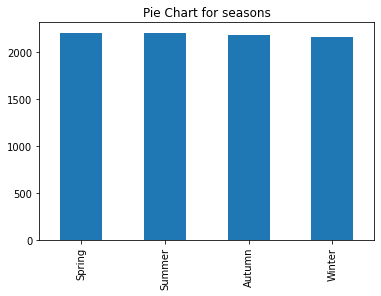

In [18]:
#To get the pie Plot to analyze churn
bike_df['Seasons'].value_counts().plot(kind="bar")
plt.title('Pie Chart for seasons')
plt.show()

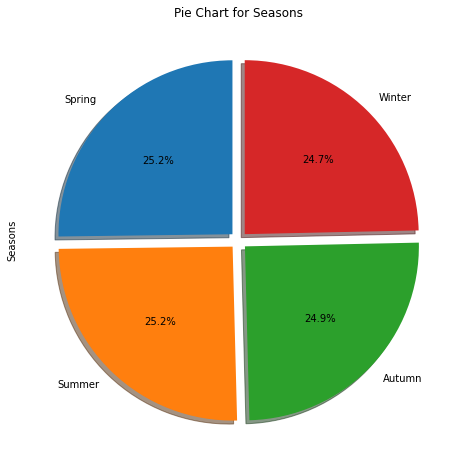

In [19]:
#To get the pie Plot to analyze seasons
bike_df['Seasons'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Seasons')
plt.show()

#### when we done univarient analysis on feature season we observed that, almost every seasons has got the same count. 

#### Analysis of seasons over demand of bike  


In [20]:
seasonwise_bike_count=bike_df.groupby("Seasons")["Bike_Count"].mean().round()
seasonwise_bike_count

Seasons
Autumn     820.0
Spring     730.0
Summer    1034.0
Winter     226.0
Name: Bike_Count, dtype: float64

#### seasons and bike_count using bar plot

[Text(0.5, 1.0, 'Count of  bikes over Seasons ')]

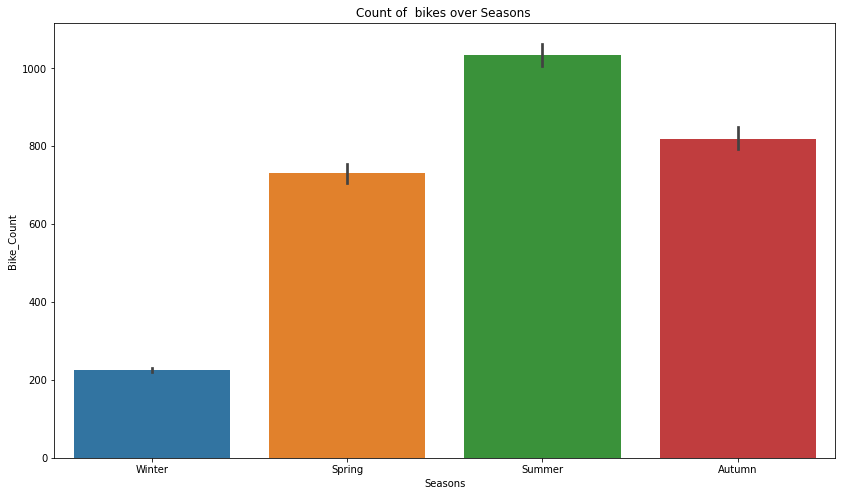

In [21]:
#vizualisation using seasons and Bike_Count using bar plot .
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=bike_df,x='Seasons',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Seasons ')


#### from above analysis we observed that average  demand for rented bike is high during summer and autumn when compared with spring but it is very less during winter seasons.



### Holiday

In [22]:
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

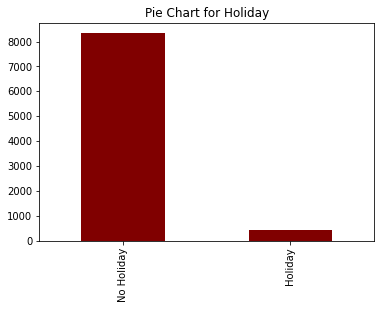

In [23]:
#To get the pie Plot to analyze churn
bike_df['Holiday'].value_counts().plot(kind="bar",color="maroon")
plt.title('Pie Chart for Holiday')
plt.show()

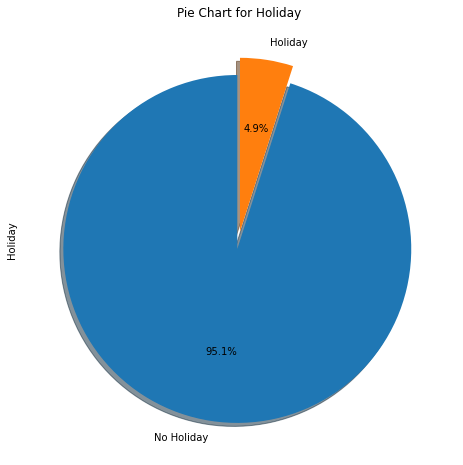

In [24]:
#To get the pie Plot to analyze churn
bike_df['Holiday'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Holiday')
plt.show()

#### when we  observed the feature holiday count of no  holiday is higher than holiday. 

In [25]:
holiday_based_bike_count=bike_df.groupby("Holiday")["Bike_Count"].mean().round()
holiday_based_bike_count

Holiday
Holiday       500.0
No Holiday    715.0
Name: Bike_Count, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Holiday ')]

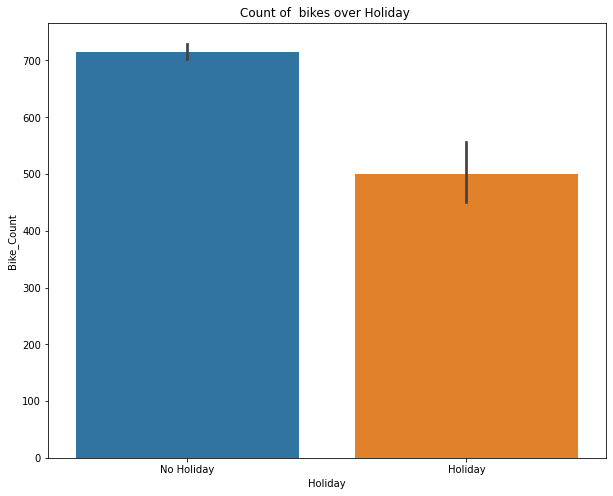

In [26]:
#analysis of data by vizualisation using holiday and Bike_Count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Holiday',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Holiday ')

#### Here we have observed that average demand for rented bike is high during normal day than during holiday.


### Functioning_Day

In [27]:
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

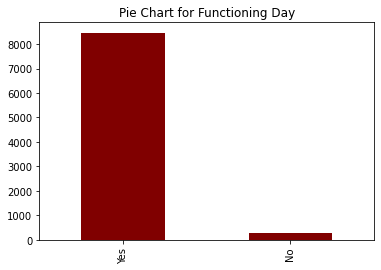

In [28]:
#To get the pie Plot to analyze Functioning Day
bike_df['Functioning_Day'].value_counts().plot(kind="bar",color="maroon")
plt.title('Pie Chart for Functioning Day')
plt.show()

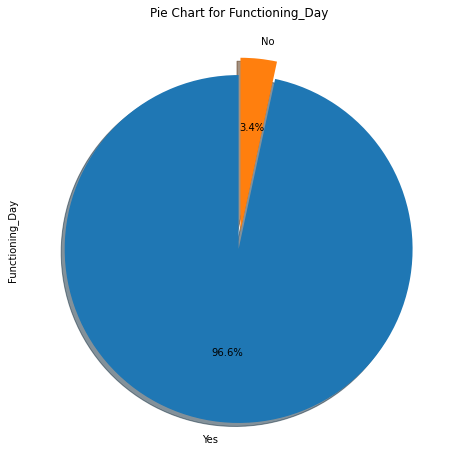

In [29]:
#To get the pie Plot to analyze churn
bike_df['Functioning_Day'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Functioning_Day')
plt.show()

##### when we observed the functioning day feature count of functioning day means working day has higher count than the weekend counts.

In [30]:
functioning_day_based_bike_count=bike_df.groupby("Functioning_Day")["Bike_Count"].mean().round()
functioning_day_based_bike_count

Functioning_Day
No       0.0
Yes    729.0
Name: Bike_Count, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Functioning_Day ')]

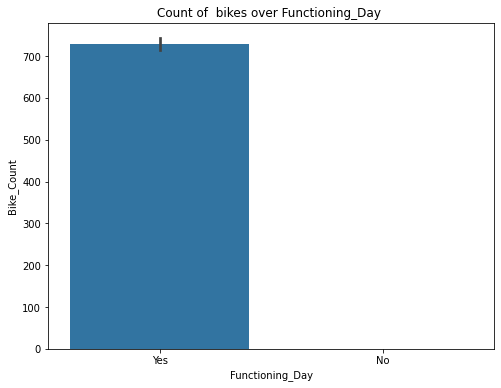

In [31]:
#analysis of data by vizualisation using functioning_day and Bike_Count.
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Functioning_Day ')

#### we have observed that bike sharing demand is high functioning day(week_day). Also, observed that there is no demand for bike sharing during weekend 

###**Univarient analysis for numerical variables**

In [32]:
### Univarient analysis  of continuous variables
bike_numerics_col = bike_df.select_dtypes(include=np.number).columns.tolist()
print("numerical columns \n")
print(bike_numerics_col)

numerical columns 

['Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rainfall', 'Snowfall']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


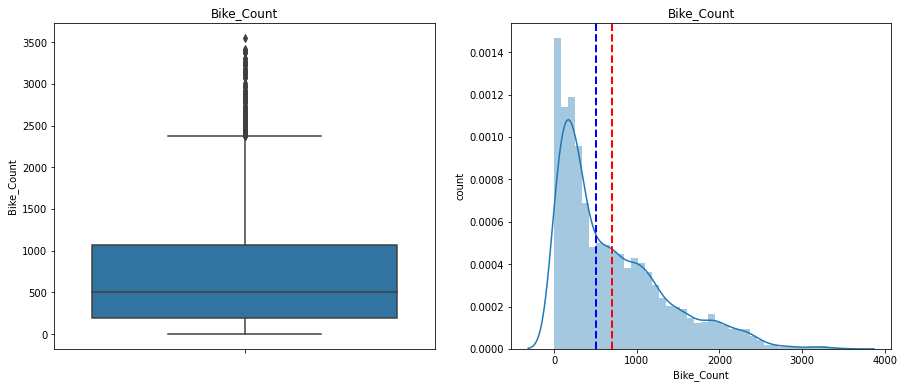

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


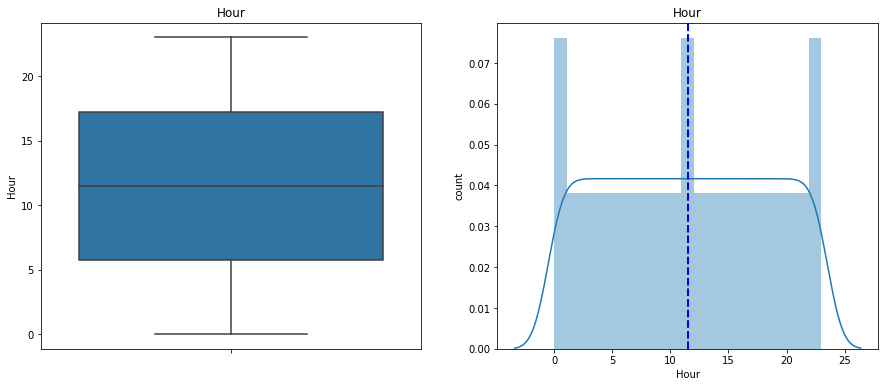

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


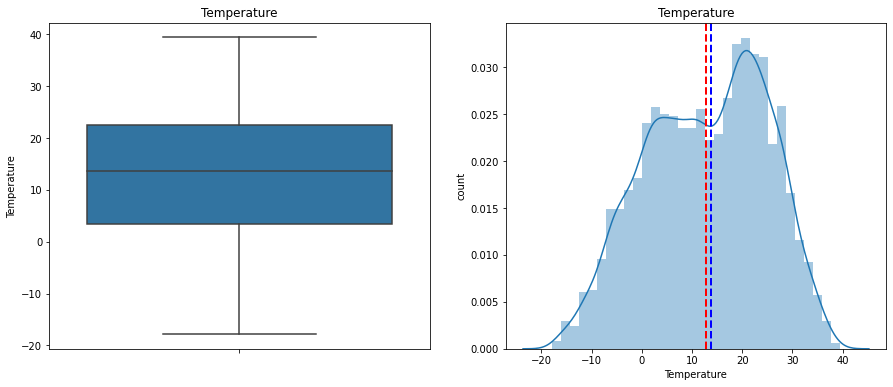

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


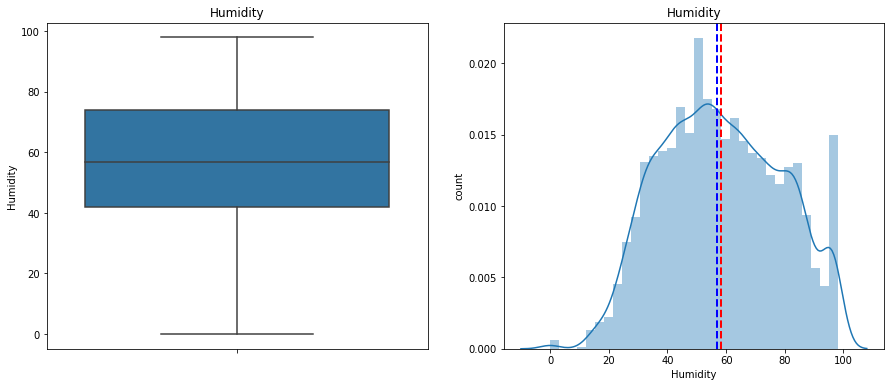

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


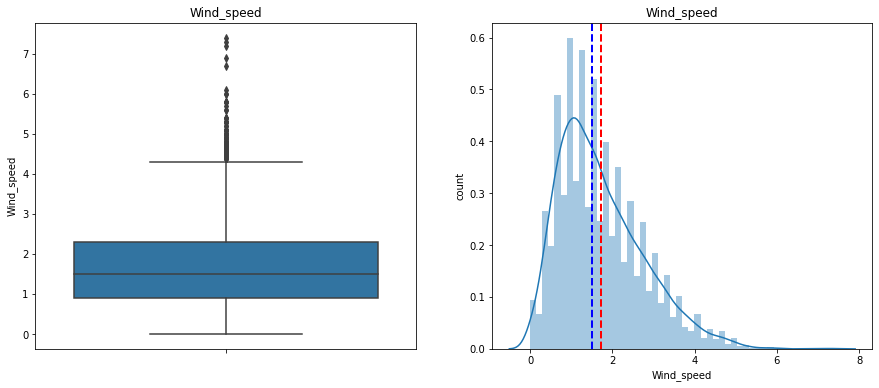

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


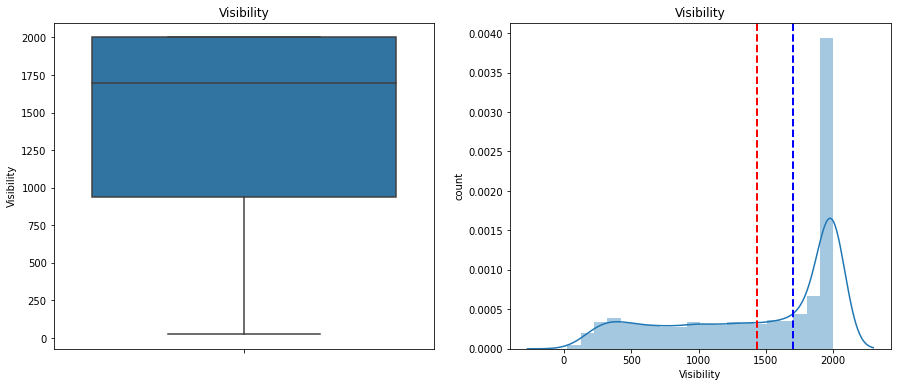

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


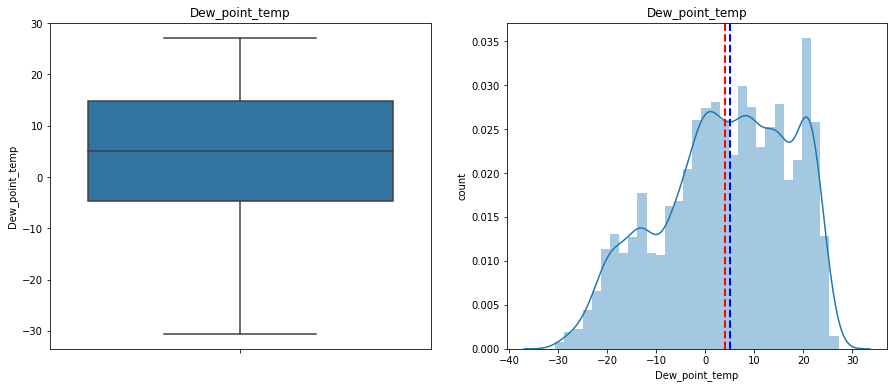

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


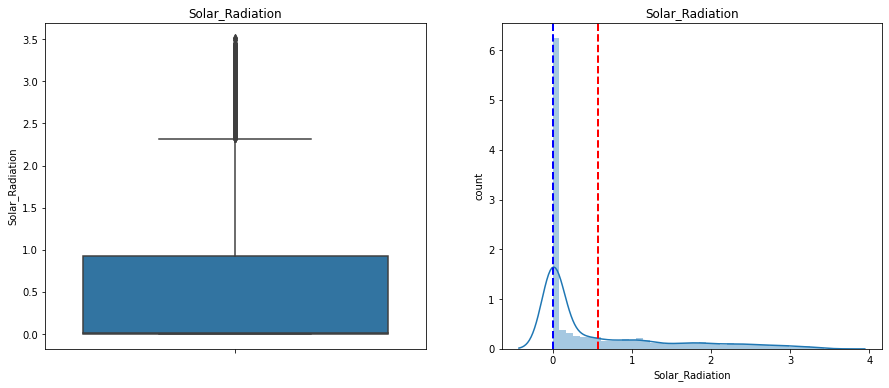

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


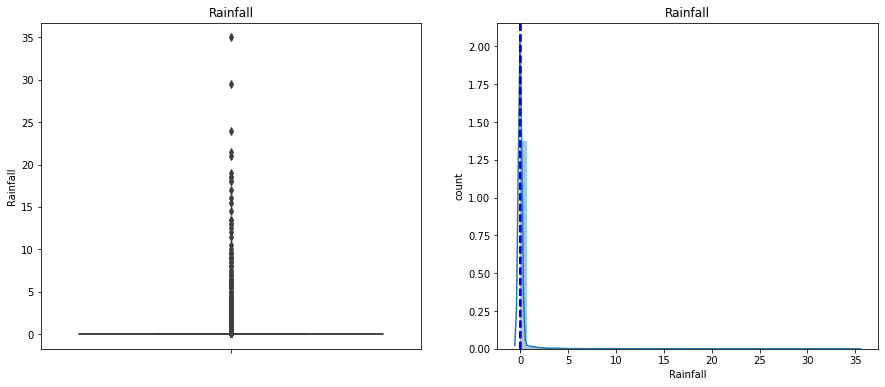

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


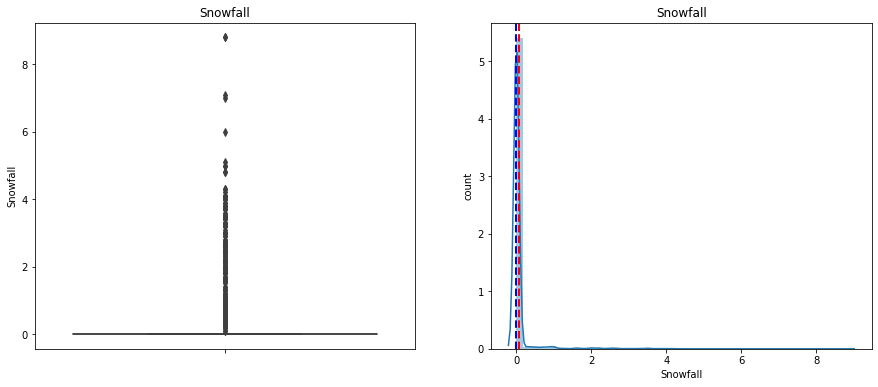

In [33]:
for var in bike_numerics_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=bike_df[var])
    fig.set_title(var)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(bike_df[var])
    plt.axvline(bike_df[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(bike_df[var].median(), color='blue', linestyle='dashed', linewidth=2)
    fig.set_title(var)
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

In [34]:
print("skewness of the numerical column distribution is as follows:\n")
for var in bike_numerics_col:
     print(f'{var} has skewness ...........  {round(bike_df[var].skew(),3)}')

skewness of the numerical column distribution is as follows:

Bike_Count has skewness ...........  1.153
Hour has skewness ...........  0.0
Temperature has skewness ...........  -0.198
Humidity has skewness ...........  0.06
Wind_speed has skewness ...........  0.891
Visibility has skewness ...........  -0.702
Dew_point_temp has skewness ...........  -0.367
Solar_Radiation has skewness ...........  1.504
Rainfall has skewness ...........  14.533
Snowfall has skewness ...........  8.441


from above analysis we have observed there are right as well as left skewed data
### Uniformly distributed variable

Hour


### left skewed variable

Dew_point_temp, Visibility, Temperature   

### right skewed variable
**The skewness caused due to the presence of outliers: Bike_Count, Wind_speed, Solar_Radiation, Rainfall, Snowfall** 


so, we need to deal with outlier in later part before that we will check bivarient analysis on each numerical columns

### Analysis of numerical column one by one

### **Bike_count the target variable**

In [35]:
bike_df['Bike_Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Bike_Count, Length: 2166, dtype: int64

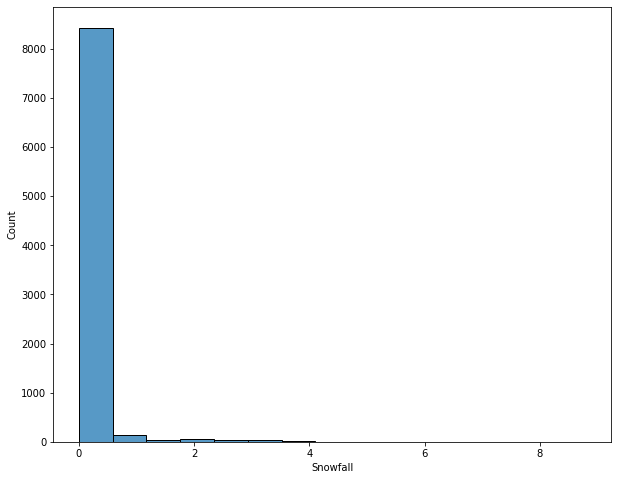

In [36]:
fig,ax=plt.subplots(figsize=(10,8))
sns.histplot(bike_df[var])

as we seen earlier that the target variable bike_count is right skewed data so we need to handle this by 

### **Hour based analysis**

In [37]:
bike_df["Hour"].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

we can infere from above that the whole dataset  contains information of total one year

In [38]:
hour_based_bike_count=bike_df.groupby("Hour")["Bike_Count"].mean().round()
hour_based_bike_count

Hour
0      541.0
1      426.0
2      302.0
3      203.0
4      133.0
5      139.0
6      288.0
7      606.0
8     1016.0
9      646.0
10     528.0
11     601.0
12     699.0
13     733.0
14     759.0
15     829.0
16     931.0
17    1139.0
18    1503.0
19    1195.0
20    1069.0
21    1031.0
22     923.0
23     671.0
Name: Bike_Count, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over hours of the day ')]

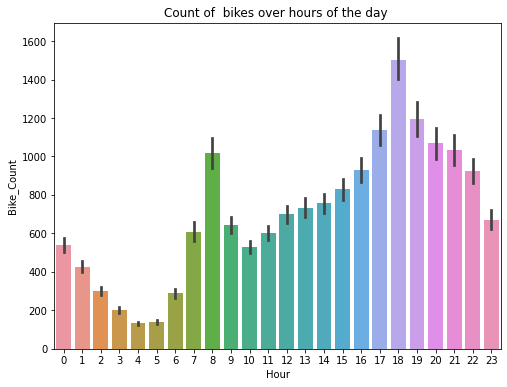

In [39]:
#analysis of data by vizualisation using hour and Bike_Count.
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Hour',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over hours of the day ')

In [40]:
##binning hour feature to shift_timings
bike_df['shift_timings'] = bike_df['Hour'].apply(lambda x: 'morning' if 6<=x<=10 else ('day' if 10<=x<=16 else ('evening' if 17<=x<=19 else 'night')))
bike_df['shift_timings'].value_counts()

night      3650
day        2190
morning    1825
evening    1095
Name: shift_timings, dtype: int64

converting into categorical column

[Text(0.5, 1.0, 'Count of  bikes over shift_timings of the day ')]

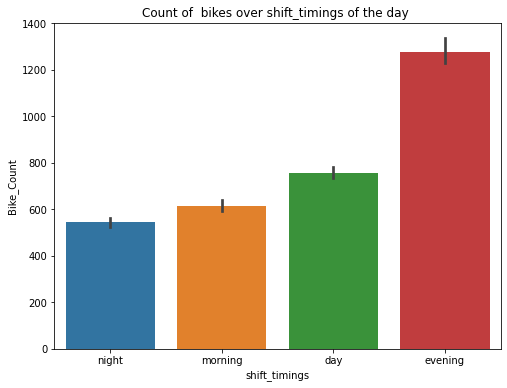

In [41]:
#analysis of data by vizualisation using shift_timings and Bike_Count.
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='shift_timings',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over shift_timings of the day ')

#### Peak hours for bike sharing demand is between 7am-9am and between 4pm- 10pm. Also it is high around 5.30pm -6.30pm 

### Temperature based analysis


In [42]:
bike_df["Temperature"].value_counts()


 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature, Length: 546, dtype: int64

[Text(0.5, 1.0, 'Count of  bikes over Temperature ')]

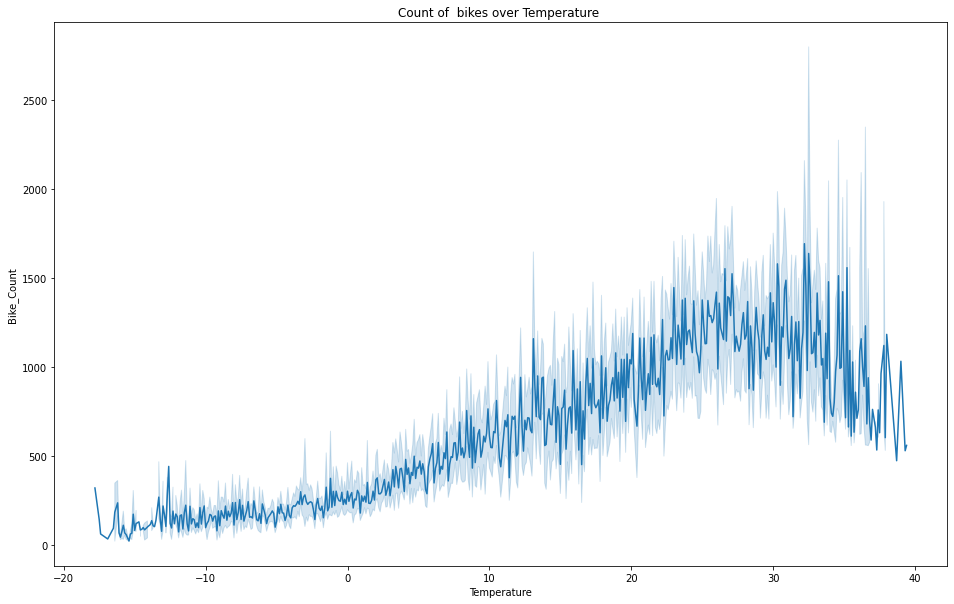

In [43]:
#analysis of data by vizualisation using hour and Bike_Count.
fig,ax=plt.subplots(figsize=(16,10))
sns.lineplot(data=bike_df,x='Temperature',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Temperature ')

#### From above analysis we observe that the average  bike sharing demand increases as temperature increases. But there is average decrease in demand of bike sharing as temperature goes above 32 degree

### Snowfall based analysis

In [44]:
snowfall_based_bike_count=bike_df.groupby("Snowfall")["Bike_Count"].mean().round()
snowfall_based_bike_count

Snowfall
0.0    732.0
0.1    102.0
0.2    243.0
0.3    198.0
0.4    285.0
0.5    139.0
0.6    185.0
0.7    165.0
0.8    256.0
0.9    143.0
1.0    163.0
1.1    366.0
1.2     54.0
1.3    273.0
1.4    214.0
1.5    168.0
1.6    198.0
1.7    251.0
1.8    310.0
1.9    234.0
2.0    190.0
2.1    182.0
2.2    212.0
2.3    299.0
2.4    264.0
2.5    198.0
2.6    109.0
2.7    168.0
2.8    178.0
2.9    328.0
3.0    234.0
3.1    119.0
3.2    257.0
3.3    280.0
3.4    184.0
3.5    133.0
3.6    436.0
3.7    263.0
3.8     92.0
3.9     47.0
4.0     40.0
4.1    115.0
4.2    116.0
4.3     25.0
4.8     40.0
5.0    187.0
5.1     62.0
6.0    241.0
7.0    167.0
7.1     24.0
8.8     88.0
Name: Bike_Count, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over snowfall ')]

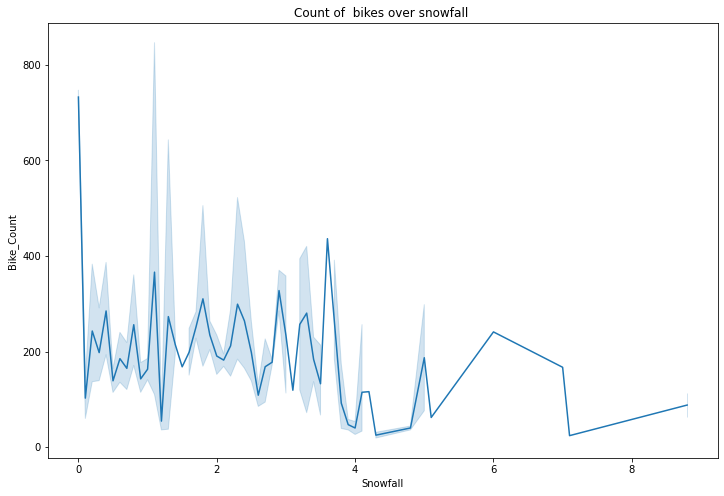

In [45]:
#analysis of data by vizualisation using hour and Bike_Count.
fig,ax=plt.subplots(figsize=(12,8))
sns.lineplot(data=bike_df,x='Snowfall',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over snowfall ')

#### we can see that during snow fall the average  demand for bike is more when there is no snowfall i.e (0.0 is around 732). But still we can observe that there is average  demand between 100-300 for snow fall rate around 0-3.5.Also we can infere from above analysis that as snow fall rate increases bike sharing demand decreases.

### Analysis of humidity

In [46]:
Humidity_based_bike_count=bike_df.groupby("Humidity")["Bike_Count"].mean().round()
Humidity_based_bike_count

Humidity
0      408.0
10    1315.0
11    1986.0
12    2032.0
13    1451.0
       ...  
94     253.0
95     179.0
96     171.0
97     166.0
98     172.0
Name: Bike_Count, Length: 90, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Humidity ')]

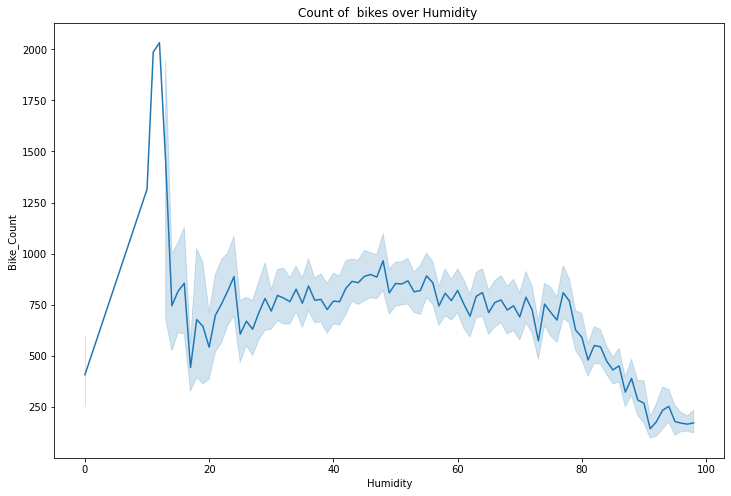

In [47]:
#analysis of data by vizualisation using hour and Bike_Count.
fig,ax=plt.subplots(figsize=(12,8))
sns.lineplot(data=bike_df,x='Humidity',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Humidity ')

#### Bike sharing demand is high when humidity is 10-17 as humidity increases demand for bike sharing decreases


### Wind_speed based analysis

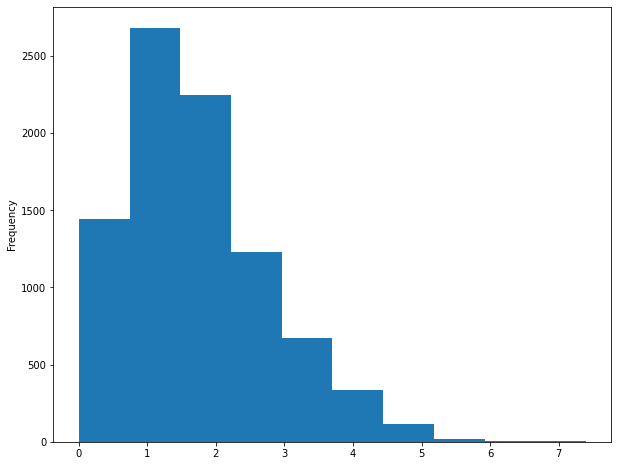

In [48]:
bike_df["Wind_speed"].plot(kind="hist",figsize=(10,8))

 #### frequency of wind speed is high between 0.5-2.5 wind rate in this dataset

In [49]:
wind_based_bike_count=bike_df.groupby("Wind_speed")["Bike_Count"].mean().round()
wind_based_bike_count

Wind_speed
0.0     448.0
0.1     591.0
0.2     498.0
0.3     455.0
0.4     471.0
        ...  
6.7     146.0
6.9      49.0
7.2    1805.0
7.3     133.0
7.4     913.0
Name: Bike_Count, Length: 65, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Wind_speed ')]

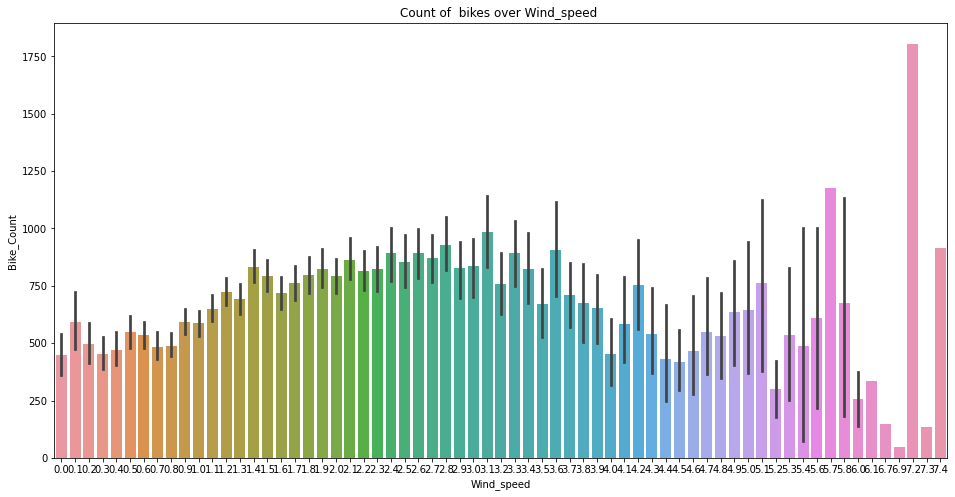

In [50]:
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=bike_df,x='Wind_speed',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Wind_speed ')

#### we can  observe from above analysis that average demand for bike sharing is high 7.2 wind rate but average of demand for bike sharing is between 450-750 for most of the observed wind rate


In [51]:
Visibility_based_bike_count=bike_df.groupby("Visibility")["Bike_Count"].mean().round()
Visibility_based_bike_count

Visibility
27       83.0
33       33.0
34       24.0
38       98.0
53       65.0
        ...  
1996    724.0
1997    833.0
1998    781.0
1999    660.0
2000    818.0
Name: Bike_Count, Length: 1789, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Visibility ')]

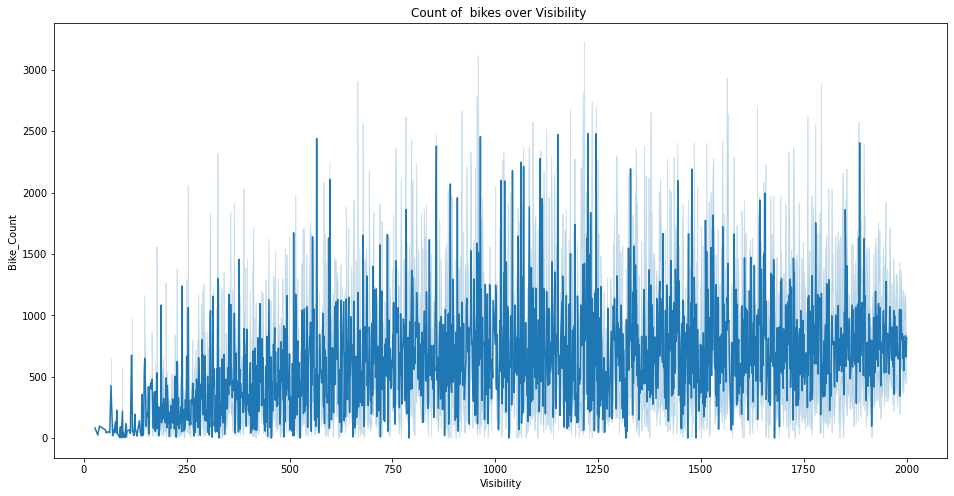

In [52]:
fig,ax=plt.subplots(figsize=(16,8))
sns.lineplot(data=bike_df,x='Visibility',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Visibility ')

#### From above analysis we can say that  increase in demand for bike sharing with increase of as visibility

### Dew_point_temp

In [53]:
dpt_based_bike_count=bike_df.groupby("Dew_point_temp")["Bike_Count"].mean().round()
dpt_based_bike_count

Dew_point_temp
-30.6      90.0
-30.5     192.0
-29.8     364.0
-29.7      71.0
-29.6      78.0
          ...  
 26.1     932.0
 26.3     468.0
 26.6     309.0
 26.8     761.0
 27.2    1117.0
Name: Bike_Count, Length: 556, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Dew_point_temp ')]

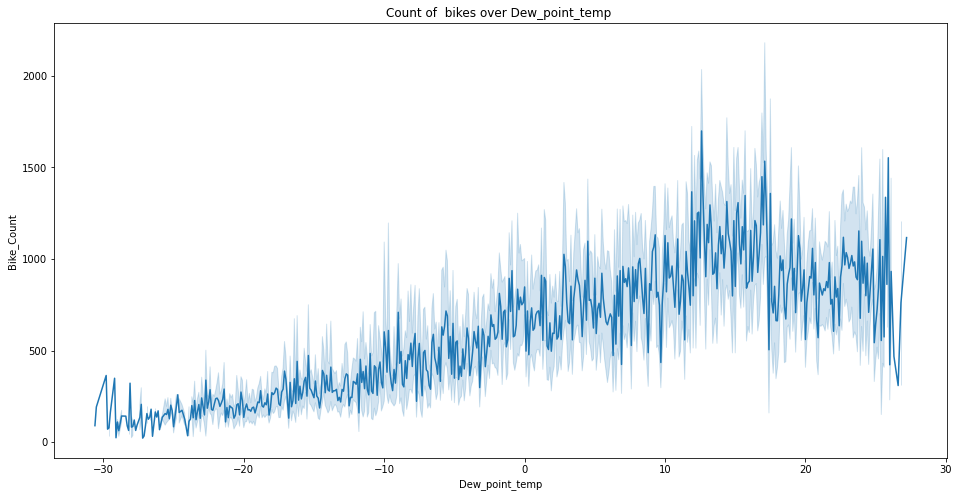

In [54]:
fig,ax=plt.subplots(figsize=(16,8))
sns.lineplot(data=bike_df,x='Dew_point_temp',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Dew_point_temp ')

#### From above analysis we can say that  increase in demand for bike sharing with increase of as dew_point_temp

### Solar_Radiation

In [55]:
solar_based_bike_count=bike_df.groupby("Solar_Radiation")["Bike_Count"].mean().round()
solar_based_bike_count

Solar_Radiation
0.00     487.0
0.01     785.0
0.02     801.0
0.03     844.0
0.04     766.0
         ...  
3.42    1272.0
3.44    1216.0
3.45     652.0
3.49    1456.0
3.52    1516.0
Name: Bike_Count, Length: 345, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Solar_Radiation ')]

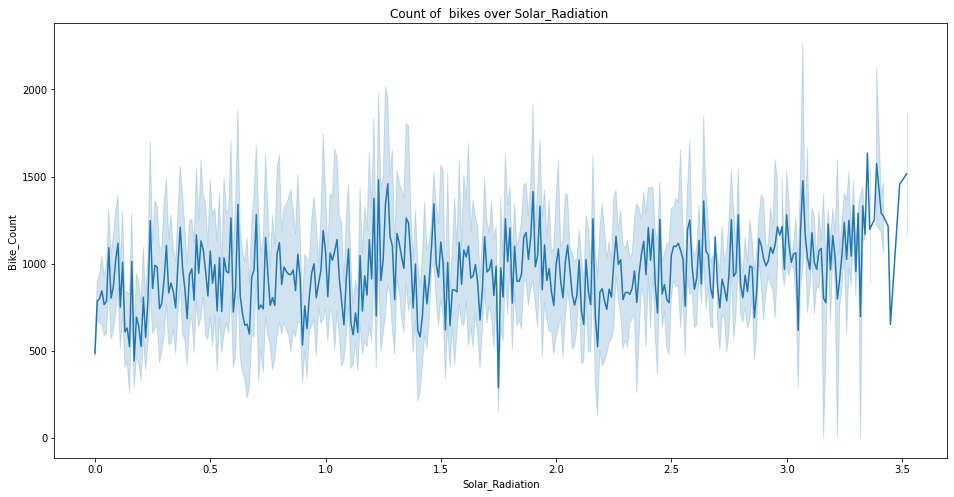

In [56]:
fig,ax=plt.subplots(figsize=(16,8))
sns.lineplot(data=bike_df,x='Solar_Radiation',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Solar_Radiation ')

#### solar radiation is less effective in demand of  bike sharing 

### Rainfall based analysis

In [57]:
rain_based_bike_count=bike_df.groupby("Rainfall")["Bike_Count"].mean().round()
rain_based_bike_count

Rainfall
0.0     739.0
0.1     330.0
0.2     185.0
0.3     156.0
0.4     134.0
        ...  
21.0     19.0
21.5    596.0
24.0     61.0
29.5    122.0
35.0    151.0
Name: Bike_Count, Length: 61, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Rainfall ')]

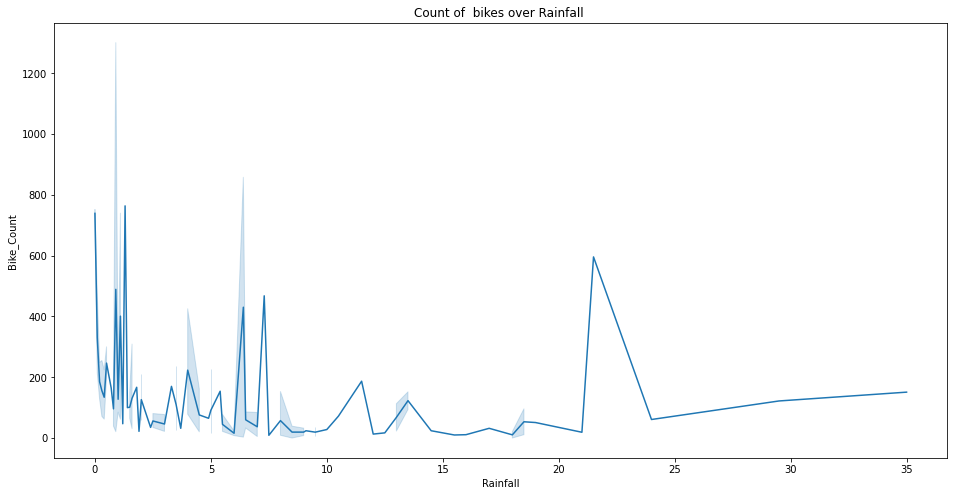

In [58]:
fig,ax=plt.subplots(figsize=(16,8))
sns.lineplot(data=bike_df,x='Rainfall',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Rainfall ')

#### As rainfall increase the demand for bike sharing decreases

### Dealing with Date feature

In [59]:
# convert datatype of date column in bike_df i.e from object type to timestamp
bike_df['Date'] = pd.to_datetime( bike_df['Date'], infer_datetime_format=True)

##### convert date column into year,month,day and lets do an analysis over each feature

In [60]:
bike_df['year'] = pd.DatetimeIndex(bike_df['Date']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['Date']).month
bike_df['Day'] = pd.DatetimeIndex(bike_df['Date']).day

In [61]:
print(bike_df['year'].unique())
print(bike_df['month'].unique())
print(bike_df['Day'].unique())

[2017 2018]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  1  2  3  4
  5  6  7  8  9 10 11]


### Month

In [62]:
monthwise_bike_count=bike_df.groupby("month")["Bike_Count"].mean().round()
monthwise_bike_count

month
1     386.0
2     393.0
3     612.0
4     773.0
5     895.0
6     982.0
7     929.0
8     826.0
9     694.0
10    843.0
11    685.0
12    419.0
Name: Bike_Count, dtype: float64

[Text(0.5, 1.0, 'Count of  bikes over Month ')]

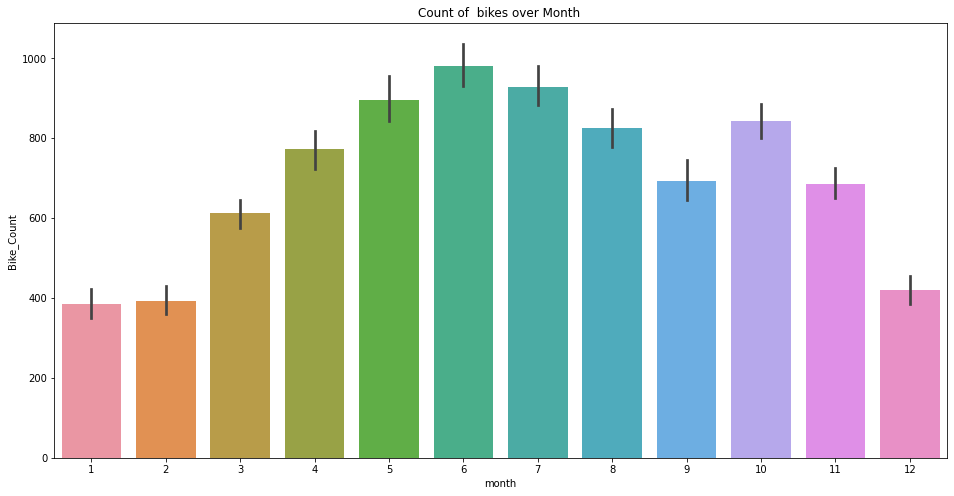

In [63]:
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=bike_df,x='month',y='Bike_Count',ax=ax)
ax.set(title='Count of  bikes over Month ')

#### we can infere from above analysis that during month 4,5,6,7,8,9,10,11 demand for bike sharing is high



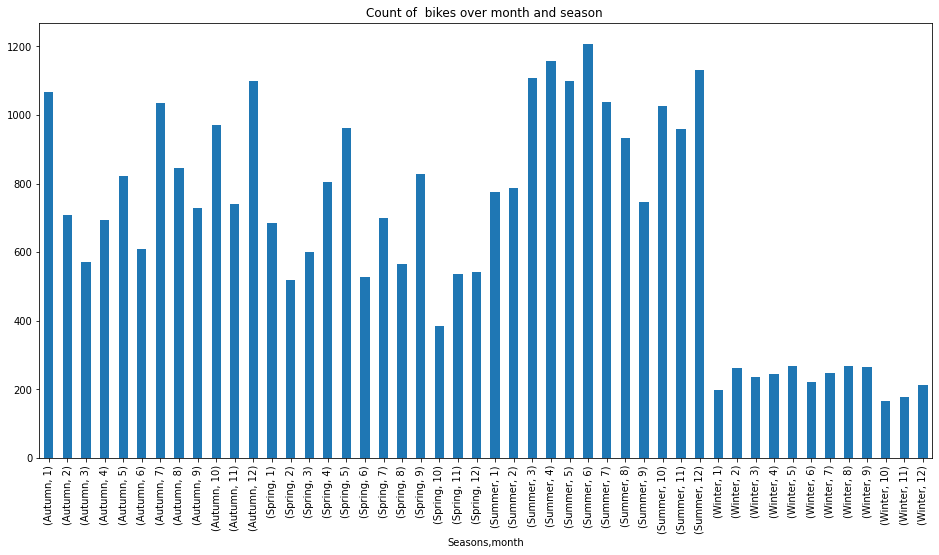

In [64]:
# seasons and monthwise analysis of the of bike sharing
fig,ax=plt.subplots(figsize=(16,8))
ax.set(title='Count of  bikes over month and season ')
bike_df.groupby(["Seasons","month"])["Bike_Count"].mean().round().plot(kind='bar')

we already know that the summer and autumn season has highest demand for the bike sharing so there is no need to consider monthwise bike demand. we can drop the month column also.

### year and Day

As we know earlier the dataset contains only one year data so no need to worry more on that we can drop the year column.
Also we have day column since, already we had information of weekday and weekend information  so no need to consider day column again.

#### here we drop 'Date','day','year','month',Hour from the bike_df

In [65]:
bike_df=bike_df.drop(columns=['Date','Day','year','month','Hour'],axis=1)

In [66]:
dependent_df=["Bike_Count"]
independent_conti_df=['Temperature', 'Humidity', 'Wind_speed',
        'Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rainfall',
        'Snowfall']

### Checking for assumptions:
#### 1. Linearity

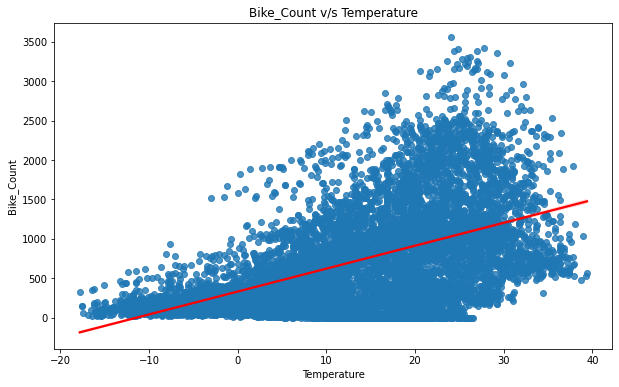

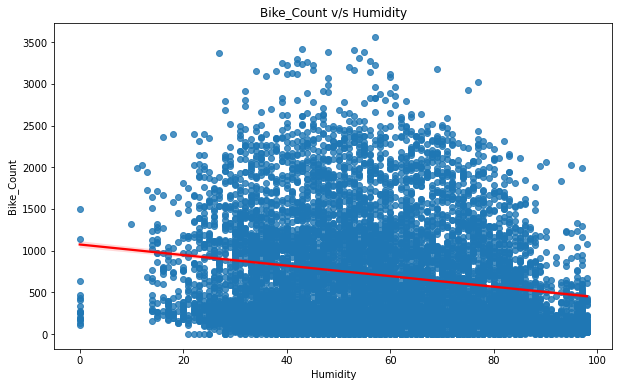

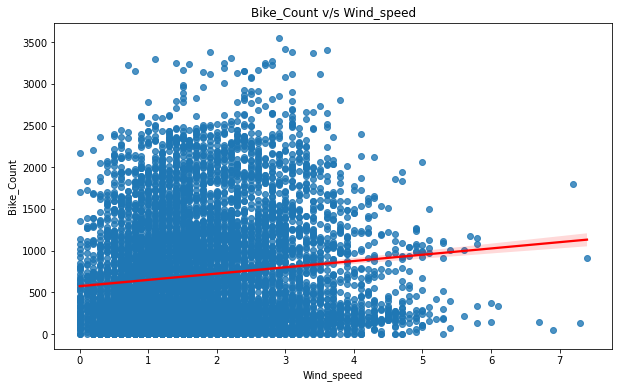

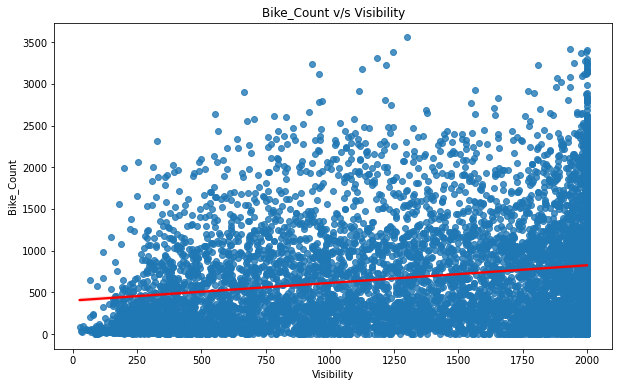

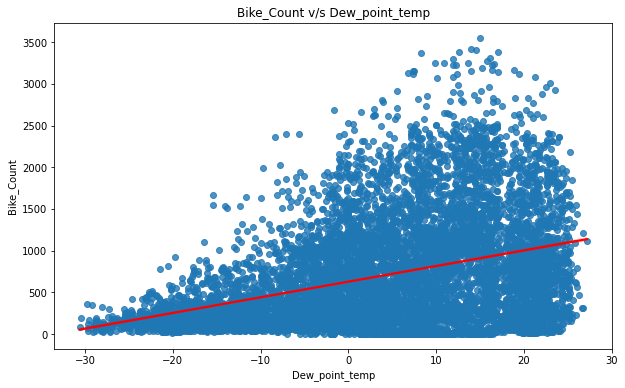

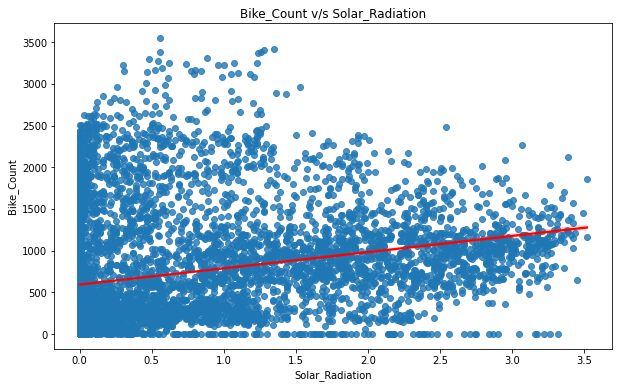

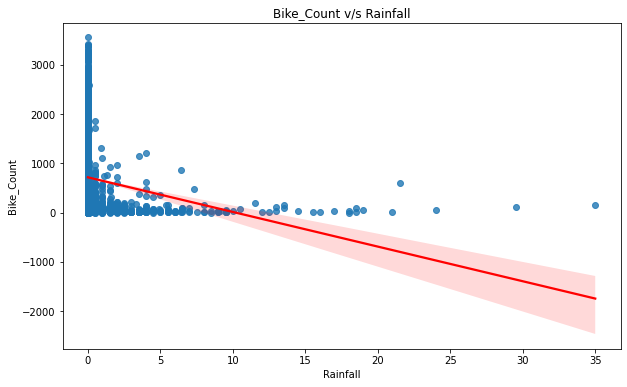

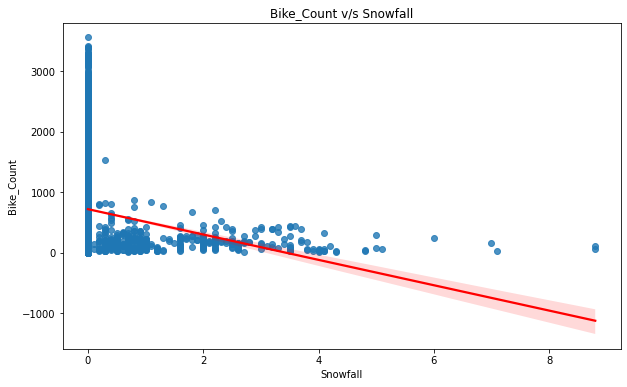

In [67]:
for var in independent_conti_df:
    plt.figure(figsize=(10,6))
    fig =sns.regplot(data = bike_df, x = var, y ='Bike_Count',line_kws={"color": "red"})
    fig.set_title(f'Bike_Count v/s {var}')
    fig.set_xlabel(var)
    fig.set_ylabel("Bike_Count")

**From above analysis we come to conclusion that 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temp', 'Solar_Radiation', are linearly related in positive direction with demand for bike  i.e bike count. 'Humidity' 'Rainfall','Snowfall' are linearly related but in negative direction with demand for bike  i.e bike count** 

Correcting skewness of the target variable **Bike_Count**.
let's plot the distribution and boxplot  for Bike_Count of bike_df.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


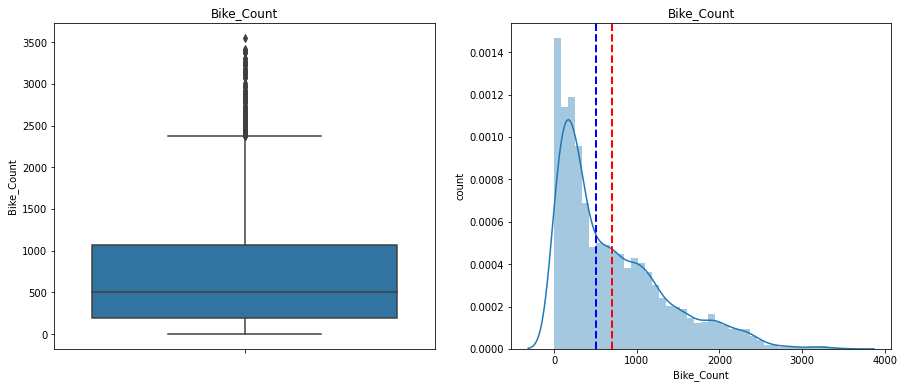

In [68]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=bike_df["Bike_Count"])
fig.set_title("Bike_Count")
fig.set_ylabel("Bike_Count")

plt.subplot(1, 2, 2)
fig = sns.distplot(bike_df["Bike_Count"])
plt.axvline(bike_df["Bike_Count"].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(bike_df["Bike_Count"].median(), color='blue', linestyle='dashed', linewidth=2)
fig.set_title("Bike_Count")
fig.set_ylabel('count')

plt.show()

In [69]:
print(f'skewness before dealing with skewness of data {round(bike_df["Bike_Count"].skew(),3)}')

skewness before dealing with skewness of data 1.153


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


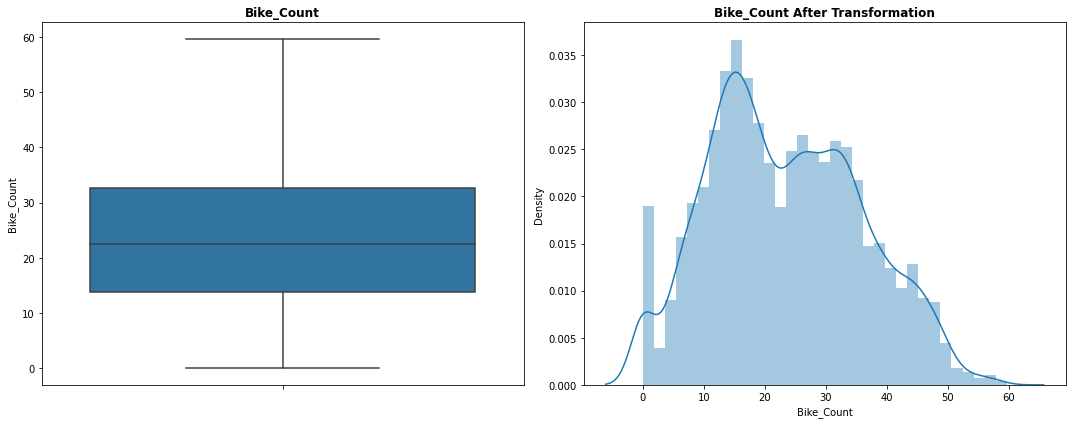

In [70]:
#after sqrt transformation 
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=np.sqrt(bike_df['Bike_Count']))
fig.set_title("Bike_Count",weight='bold')
fig.set_ylabel("Bike_Count")

plt.subplot(1, 2, 2)
fig = sns.distplot(np.sqrt(bike_df['Bike_Count'])).set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()
plt.show()

In [71]:
print(f'skewness before dealing with skewness of data {round(((np.sqrt(bike_df.Bike_Count)).skew()),3)}')

skewness before dealing with skewness of data 0.237


## Converting categorical into numerical columns

In [72]:
# Create dummy variables for the catgeorical variable Seasons
bike_df['Spring'] = np.where(bike_df['Seasons']=='Spring', 1, 0)
bike_df['Summer'] = np.where(bike_df['Seasons']=='Summer', 1, 0)
bike_df['Autumn'] = np.where(bike_df['Seasons']=='Autumn', 1, 0)
bike_df['Winter'] = np.where(bike_df['Seasons']=='Winter', 1, 0)

# Create dummy variables for the catgeorical variable  Holiday
bike_df['Holiday'] = np.where(bike_df['Holiday']=='Holiday', 1, 0)

# Create dummy variables for the catgeorical variable  Functioning Day 
bike_df['Functioning_Day'] = np.where(bike_df['Functioning_Day']=='Yes', 1, 0)

# Create dummy variables for the catgeorical variable  shift_timings 
bike_df['morning'] = np.where(bike_df['shift_timings']=='morning', 1, 0)
bike_df['day_time'] = np.where(bike_df['shift_timings']=='evening', 1, 0)
bike_df['evening'] = np.where(bike_df['shift_timings']=='day', 1, 0)
bike_df['night'] = np.where(bike_df['shift_timings']=='night', 1, 0)

# Drop the original column State from the dataframe
bike_df.drop(columns=['Seasons',"shift_timings"],axis=1,inplace=True)



### 3.correlation 

In [73]:
corr_matrix= round(bike_df.corr(),3)
corr_matrix

,Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Spring,Summer,Autumn,Winter,morning,day_time,evening,night
Bike_Count,1.000,0.539,-0.200,0.121,0.199,0.380,0.262,-0.123,-0.142,-0.072,0.204,0.023,0.297,0.103,-0.425,-0.070,0.337,0.048,-0.211
Temperature,0.539,1.000,0.159,-0.036,0.035,0.913,0.354,0.050,-0.218,-0.056,-0.050,0.008,0.666,0.060,-0.739,-0.093,0.076,0.157,-0.112
Humidity,-0.200,0.159,1.000,-0.337,-0.543,0.537,-0.462,0.236,0.108,-0.050,-0.021,0.016,0.193,0.028,-0.238,0.151,-0.134,-0.351,0.274
Wind_speed,0.121,-0.036,-0.337,1.000,0.172,-0.176,0.332,-0.020,-0.004,0.023,0.005,0.084,-0.065,-0.128,0.109,-0.188,0.193,0.305,-0.243
Visibility,0.199,0.035,-0.543,0.172,1.000,-0.177,0.150,-0.168,-0.122,0.032,-0.026,-0.187,0.062,0.117,0.009,-0.092,0.074,0.059,-0.026
Dew_point_temp,0.380,0.913,0.537,-0.176,-0.177,1.000,0.094,0.126,-0.151,-0.067,-0.053,0.002,0.652,0.063,-0.722,-0.011,0.007,-0.027,0.029
Solar_Radiation,0.262,0.354,-0.462,0.332,0.150,0.094,1.000,-0.074,-0.072,-0.005,-0.008,0.080,0.128,-0.031,-0.178,-0.046,-0.056,0.715,-0.552
Rainfall,-0.123,0.050,0.236,-0.020,-0.168,0.126,-0.074,1.000,0.008,-0.014,0.002,0.018,0.054,-0.013,-0.059,0.012,0.005,-0.004,-0.010
Snowfall,-0.142,-0.218,0.108,-0.004,-0.122,-0.151,-0.072,0.008,1.000,-0.013,0.032,-0.100,-0.100,-0.025,0.226,0.032,-0.020,0.001,-0.013
Holiday,-0.072,-0.056,-0.050,0.023,0.032,-0.067,-0.005,-0.014,-0.013,1.000,-0.028,-0.045,-0.074,0.015,0.105,-0.000,-0.000,-0.000,-0.000


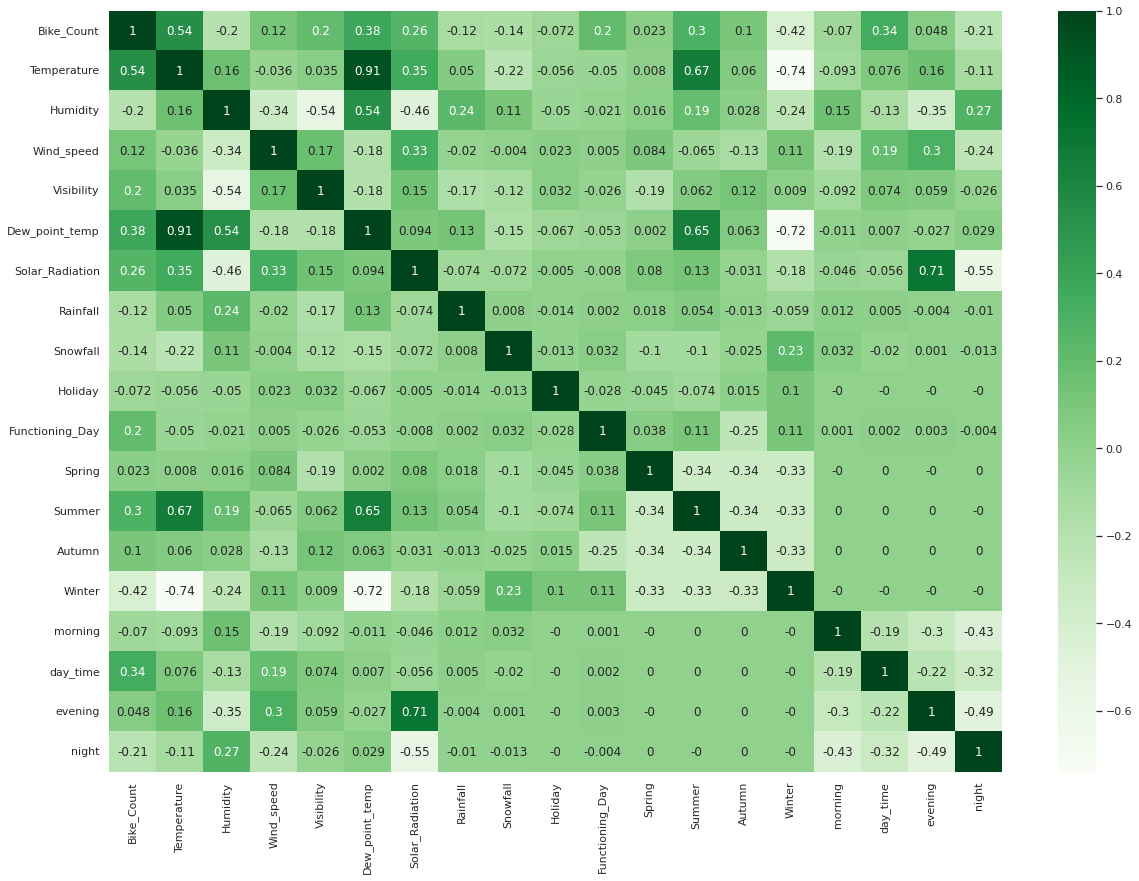

In [74]:
#visualization using heatmap
sns.set(rc={'figure.figsize':(20,14)})
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

### 1. We can see from above heat map dew_point_ and temperature is highly correlated with each other. But we can drop dew_point_temp because it is less correlated with bike_count on comparision with temperature.

### 2. As we know there there is correlation exist between temperature, humidity and solar_radiation as temperature increase humidity increases

### 3. due high humidity, or high rain fall or high snow fall the demand for bike sharing will increase we can analyse this by observing above heat map that is these three are negatively correlated with bike_count.

### 4. there are feature such as morning, evening are not much correlated with bike_count so we can drop these columns

In [75]:
# Drop the original column State from the dataframe
bike_df.drop(columns=["Dew_point_temp","morning","evening"],axis=1,inplace=True)
